In [133]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score as r2

In [134]:
import warnings
warnings.filterwarnings('ignore')

In [135]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)))
        
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

In [136]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'
PREDICTIONS_PATH = 'predictions.csv '

Загрузка данных

In [137]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

Обзор обучающего датасета¶

In [138]:
print(train_df.shape)

(10000, 20)


In [139]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB
None


In [140]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


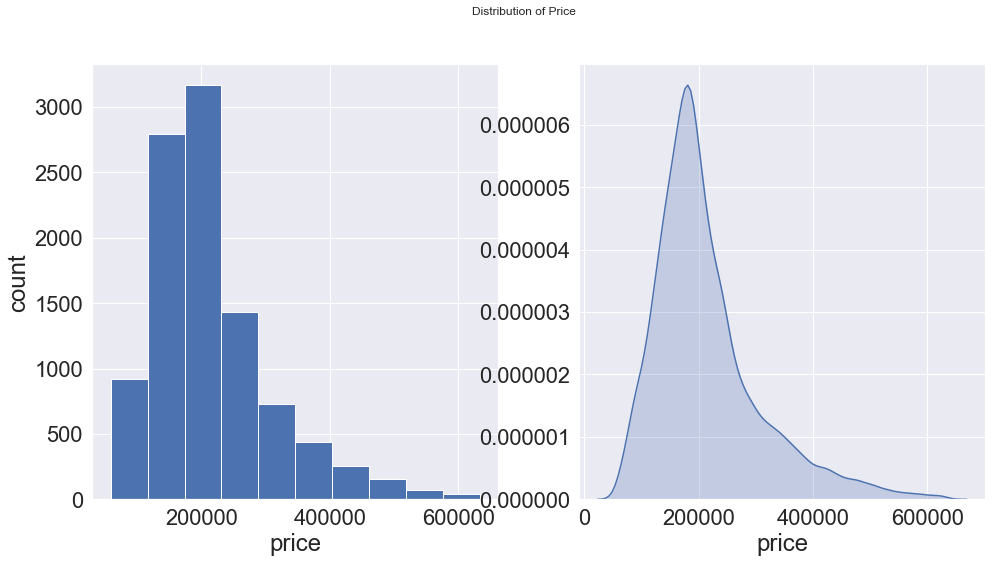

In [141]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
train_df['Price'].hist()
plt.ylabel('count')
plt.xlabel('price')

plt.subplot(122)
sns.kdeplot(train_df['Price'], shade=True, legend=False)
plt.xlabel('price')

plt.suptitle('Distribution of Price')
plt.show()

Подготовка обучающего датасета

Исключаем признак "Healthcare_1", т.к. по нему почти 50% пропусков

In [142]:
train_df = train_df.drop('Healthcare_1', axis=1)

Преобразуем категориальные признаки "Ecology_2", "Ecology_3", "Shops_2" в бинарные

In [143]:
print(train_df['Ecology_2'].value_counts())
print(train_df['Ecology_3'].value_counts())
print(train_df['Shops_2'].value_counts())

B    9903
A      97
Name: Ecology_2, dtype: int64
B    9725
A     275
Name: Ecology_3, dtype: int64
B    9175
A     825
Name: Shops_2, dtype: int64


In [144]:
train_df['Ecology_2_bin'] = train_df['Ecology_2'].replace({'A':0, 'B':1})
train_df['Ecology_3_bin'] = train_df['Ecology_3'].replace({'A':0, 'B':1})
train_df['Shops_2_bin'] = train_df['Shops_2'].replace({'A':0, 'B':1})

Работаем с выбросами признака "Rooms"

In [145]:
rooms_med = train_df['Rooms'].median()
train_df.loc[train_df['Rooms'].isin([0, 10, 19]), 'Rooms'] = rooms_med

Работаем с выбросами признаков "LifeSquare" и "KitchenSquare"

In [146]:
lifesq_med = train_df['LifeSquare'].median()
kitchsq_med = train_df['KitchenSquare'].median()
train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare'] = lifesq_med
train_df.loc[train_df['LifeSquare'] < 10, 'LifeSquare'] = lifesq_med
train_df.loc[train_df['LifeSquare'] > 400, 'LifeSquare'] = lifesq_med
train_df.loc[train_df['KitchenSquare'] < 5, 'KitchenSquare'] = kitchsq_med
train_df.loc[train_df['KitchenSquare'] > 80, 'KitchenSquare'] = kitchsq_med

Работаем с выбросами признака "Square"

In [147]:
square_med = train_df['Square'].median()
train_df.loc[train_df['Square'] < 16, 'Square'] = square_med
train_df.loc[train_df['Square'] > 400, 'Square'] = square_med

Работаем с выбросами признака "HouseYear"

In [148]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

Работаем с выбросами признаков "Floor" и "HouseFloor"

In [149]:
hfloor_med = train_df['HouseFloor'].median()
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = hfloor_med

In [150]:
ind = train_df[train_df['Floor'] > train_df['HouseFloor']].index
train_df.loc[ind, 'Floor'] = train_df.loc[ind, 'HouseFloor']

Вычисляем "m_2_Price" - стоимость квадратного метра общей площади

In [151]:
train_df['m_2_Price'] = train_df['Price'] / train_df['Square']

На его основе создаем новые признаки m_2_MedPriceByDistrict - медианная стоимость квадратного метра 
в зависимости от района и m_2_MedPriceByHouseYear - медианная стоимость квадратного метра 
в зависимости от возраста дома

In [152]:
m_2_MedPriceByDistrict = train_df.groupby(['DistrictId'], as_index=False).agg({'m_2_Price':'median'})\
                    .rename(columns={'m_2_Price':'m_2_MedPriceByDistrict'})
m_2_MedPriceByHouseYear = train_df.groupby(['HouseYear'], as_index=False).agg({'m_2_Price':'median'})\
                    .rename(columns={'m_2_Price':'m_2_MedPriceByHouseYear'})

Добавляем новые признаки к датасету

In [153]:
train_df = train_df.merge(m_2_MedPriceByDistrict, on=['DistrictId'], how='left')
train_df = train_df.merge(m_2_MedPriceByHouseYear, on=['HouseYear'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,m_2_Price,m_2_MedPriceByDistrict,m_2_MedPriceByHouseYear
0,14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,0.089040,...,0,11,B,184966.930730,1,1,1,3854.958571,4358.274853,4473.255408
1,15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978,0.000070,...,1,16,B,300009.450063,1,1,1,4567.491245,4437.304072,4317.685445
2,4765,53,2.0,44.947953,29.197612,6.0,8.0,12.0,1968,0.049637,...,1,3,B,220925.908524,1,1,1,4915.149522,4845.919064,4429.204254
3,5809,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977,0.437885,...,0,5,B,175616.227217,1,1,1,3291.591637,2949.975415,2901.326376
4,10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976,0.012339,...,2,4,B,150226.531644,1,1,1,3788.892642,3992.031265,4367.263383


In [154]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,m_2_Price,m_2_MedPriceByDistrict,m_2_MedPriceByHouseYear
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.888800,56.228457,35.980607,7.490600,7.918200,12.95910,1984.872400,0.118858,...,8.039200,1.319500,4.231300,214138.857399,0.990300,0.972500,0.917500,3891.739716,3927.295723,3780.144330
std,4859.01902,43.587592,0.812096,19.058793,15.378518,3.290409,5.186386,6.44346,18.416347,0.119025,...,23.831875,1.493601,4.806341,92872.293865,0.098015,0.163543,0.275139,1251.728243,997.479341,762.735269
min,0.00000,0.000000,1.000000,16.117154,10.523868,5.000000,1.000000,1.00000,1910.000000,0.000000,...,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000,752.588644,2273.498737,2764.147132
25%,4169.50000,20.000000,1.000000,41.800063,27.654813,6.000000,4.000000,9.00000,1974.000000,0.017647,...,0.000000,0.000000,1.000000,153872.633942,1.000000,1.000000,1.000000,2916.973642,2938.048239,2901.326376
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.00000,1977.000000,0.075424,...,2.000000,1.000000,3.000000,192269.644879,1.000000,1.000000,1.000000,3907.999942,4134.353749,4285.794408
75%,12592.50000,75.000000,2.000000,65.889736,41.415441,9.000000,11.000000,17.00000,2001.000000,0.195781,...,5.000000,2.000000,6.000000,249135.462171,1.000000,1.000000,1.000000,4690.526670,4562.026777,4409.376396
max,16798.00000,209.000000,6.000000,275.645284,263.542020,78.000000,42.000000,117.00000,2020.000000,0.521867,...,141.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000,11854.652892,8700.768533,7823.822055


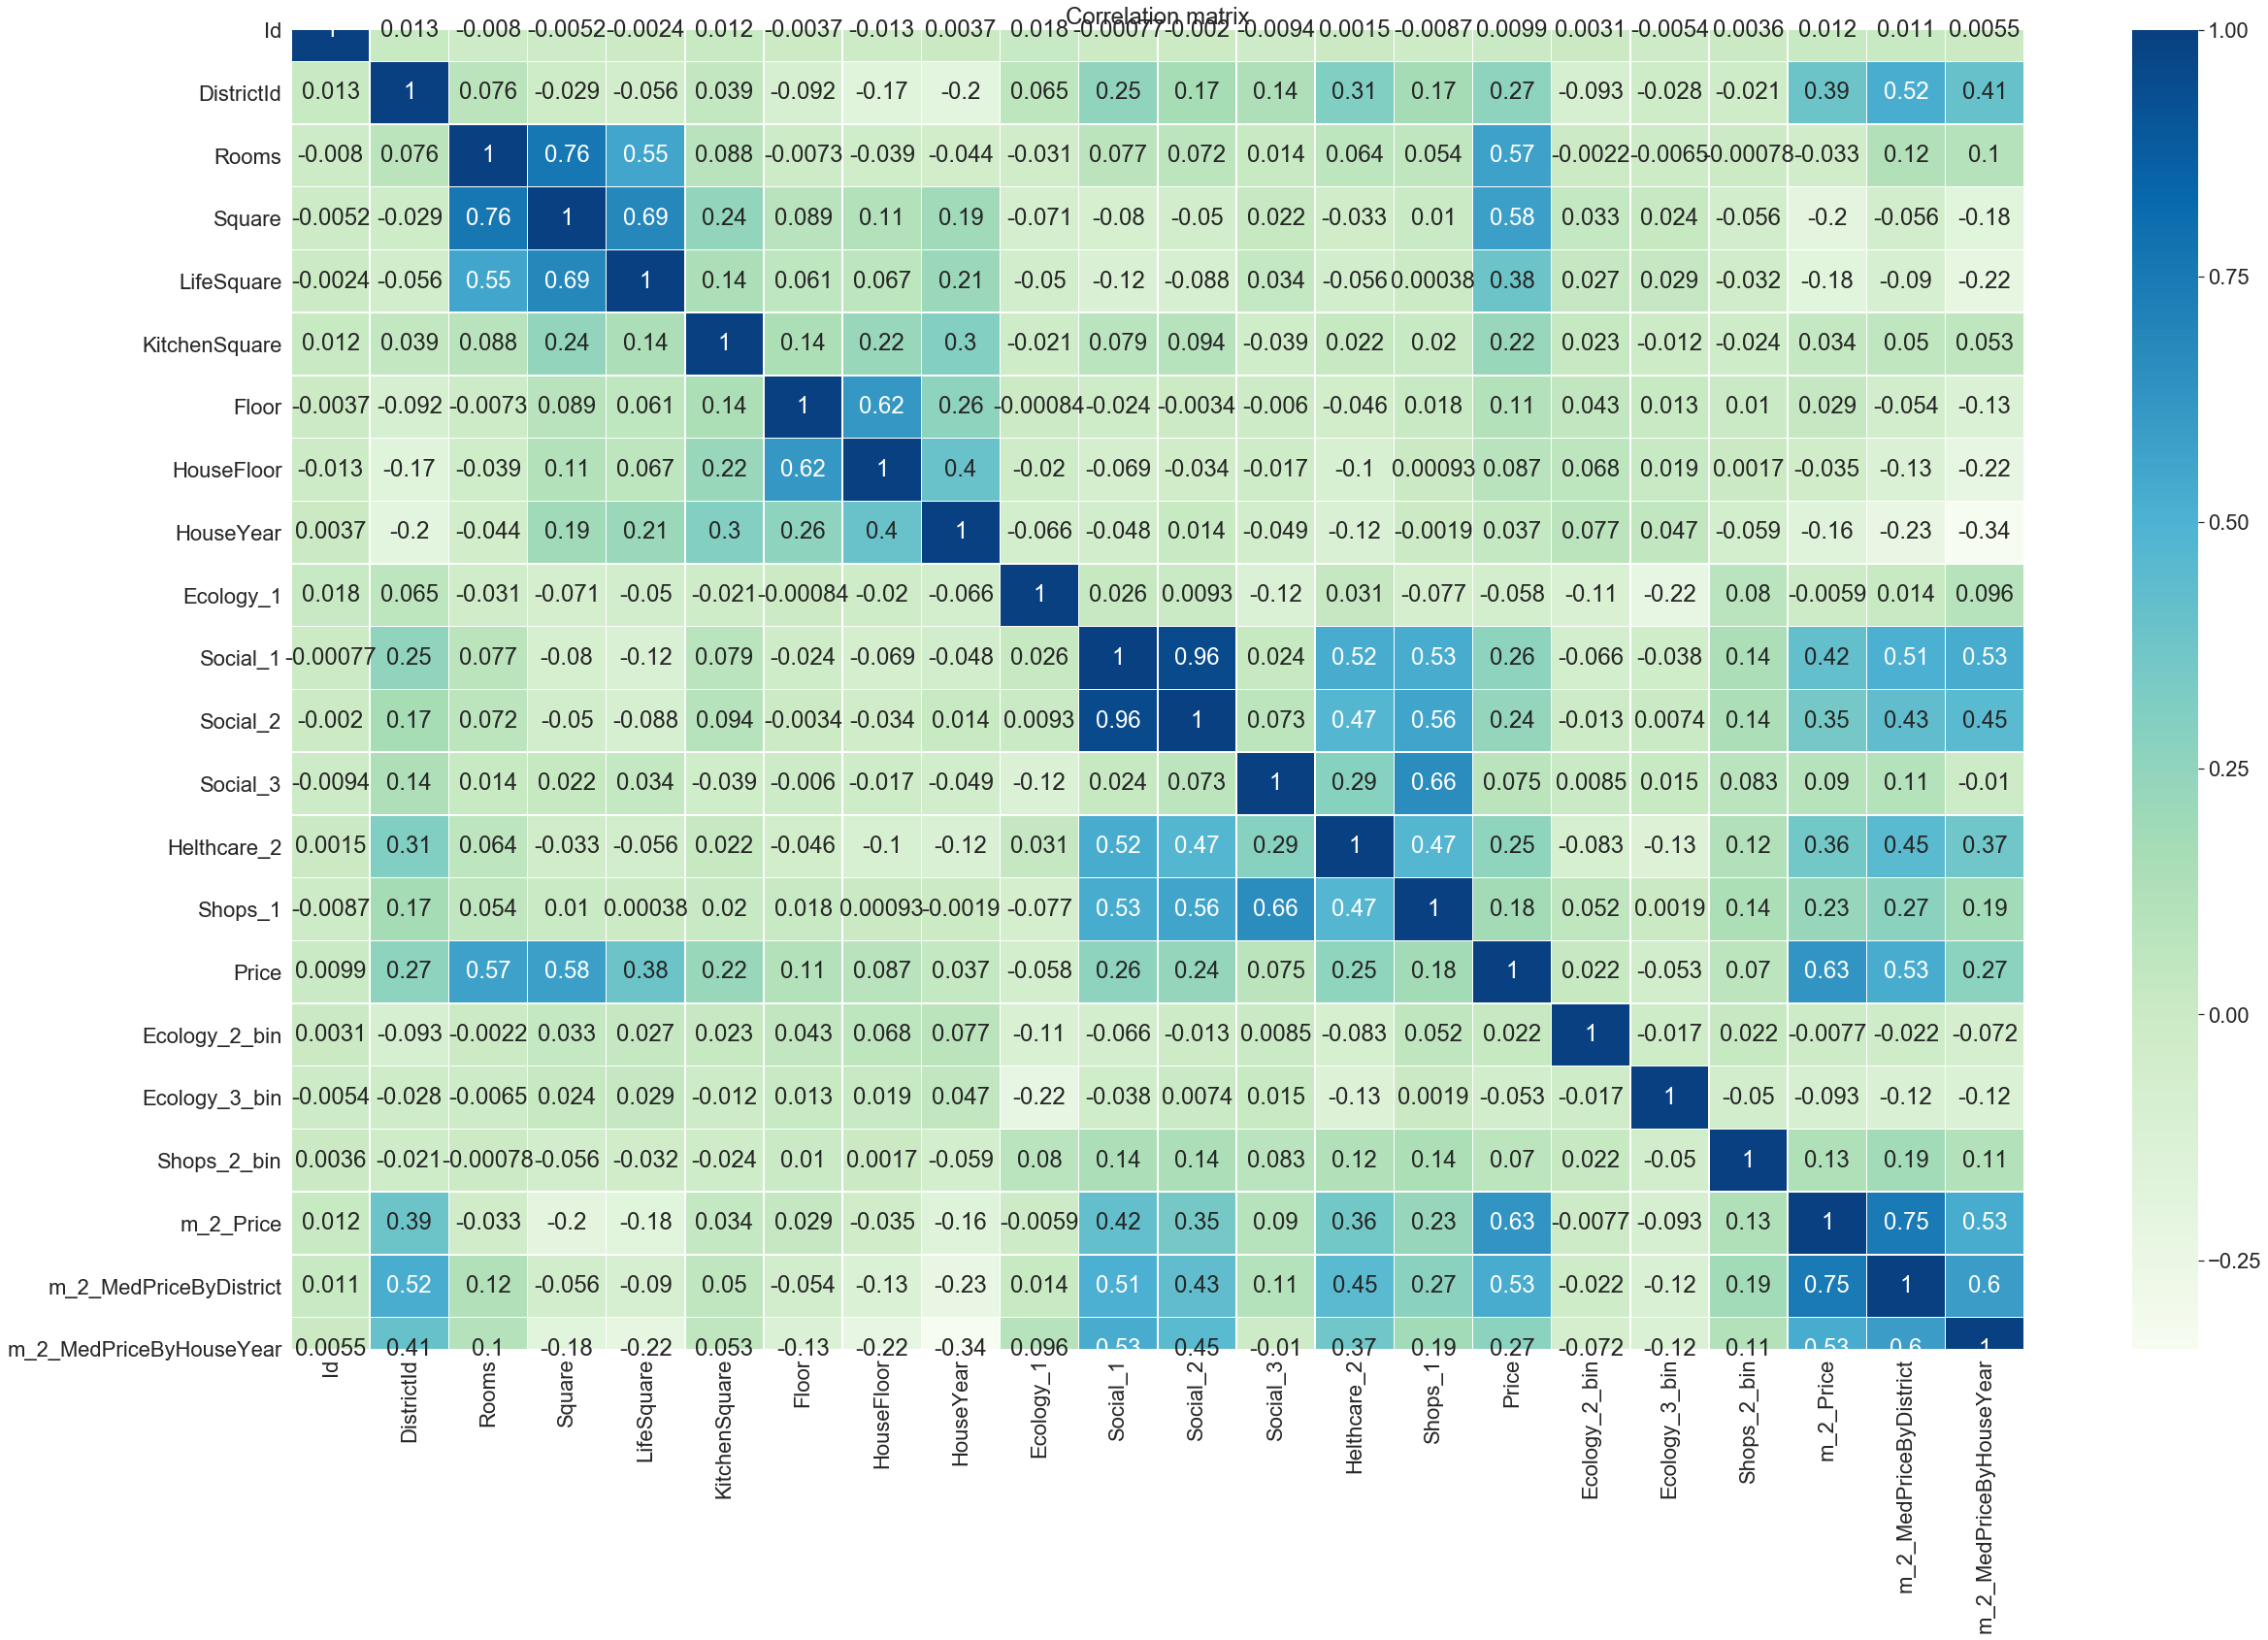

In [155]:
plt.figure(figsize = (40,25))

sns.set(font_scale=2)
sns.heatmap(train_df.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

Отбираем признаки для модели

In [156]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 
                 'm_2_MedPriceByDistrict', 'm_2_MedPriceByHouseYear', 
                 'Ecology_1','Social_1', 'Social_3', 'Helthcare_2', 'Shops_1', 
                 'Ecology_2_bin', 'Ecology_3_bin', 'Shops_2_bin',]
target_name = 'Price'

In [157]:
df = train_df[feature_names + [target_name]]
df.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,m_2_MedPriceByDistrict,m_2_MedPriceByHouseYear,Ecology_1,Social_1,Social_3,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,Price
0,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,4358.274853,4473.255408,0.089040,33,5,0,11,1,1,1,184966.930730
1,3.0,65.683640,40.049543,8.0,7.0,9.0,1978,4437.304072,4317.685445,0.000070,46,1,1,16,1,1,1,300009.450063
2,2.0,44.947953,29.197612,6.0,8.0,12.0,1968,4845.919064,4429.204254,0.049637,34,0,1,3,1,1,1,220925.908524
3,2.0,53.352981,52.731512,9.0,8.0,17.0,1977,2949.975415,2901.326376,0.437885,23,3,0,5,1,1,1,175616.227217
4,1.0,39.649192,23.776169,7.0,11.0,12.0,1976,3992.031265,4367.263383,0.012339,35,1,2,4,1,1,1,150226.531644


Масштабируем признаки

In [158]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names])

In [159]:
df[feature_names] = pd.DataFrame(stand_features, columns=feature_names)
df.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,m_2_MedPriceByDistrict,m_2_MedPriceByHouseYear,Ecology_1,Social_1,Social_3,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,Price
0,0.136936,-0.432730,-0.425150,-0.453036,-0.177049,-0.614468,-0.861908,0.432090,0.908763,-0.250529,0.474169,-0.127533,-0.883480,1.408356,0.09897,0.16816,0.299864,184966.930730
1,1.368379,0.496131,0.264599,0.154821,-0.177049,-0.614468,-0.373187,0.511323,0.704790,-0.998053,1.215681,-0.295384,-0.213923,2.448700,0.09897,0.16816,0.299864,300009.450063
2,0.136936,-0.591909,-0.441092,-0.453036,0.015773,-0.148856,-0.916210,0.920991,0.851006,-0.581588,0.531208,-0.337347,-0.213923,-0.256195,0.09897,0.16816,0.299864,220925.908524
3,0.136936,-0.150882,1.089295,0.458750,0.015773,0.627163,-0.427489,-0.979839,-1.152250,2.680470,-0.096225,-0.211458,-0.883480,0.159943,0.09897,0.16816,0.299864,175616.227217
4,-1.094506,-0.869945,-0.793643,-0.149107,0.594239,-0.148856,-0.481792,0.064902,0.769793,-0.894969,0.588247,-0.295384,0.455633,-0.048126,0.09897,0.16816,0.299864,150226.531644


Разбиваем на обучающую и валидационную выборку

In [160]:
X = df[feature_names]
y = df[target_name]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.67, shuffle=True, random_state=42)

Моделируем

In [161]:
gb_model = GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

R2:	0.91


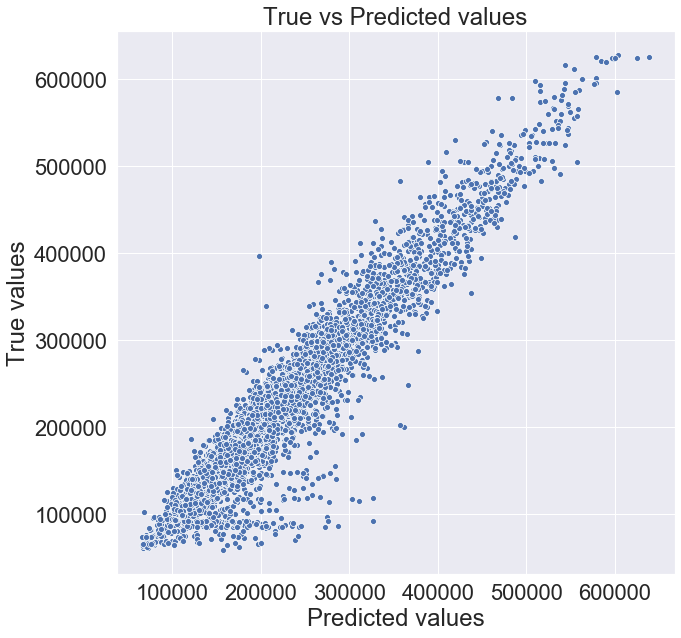

In [162]:
y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

Проверка на валидационной выборке

R2:	0.743


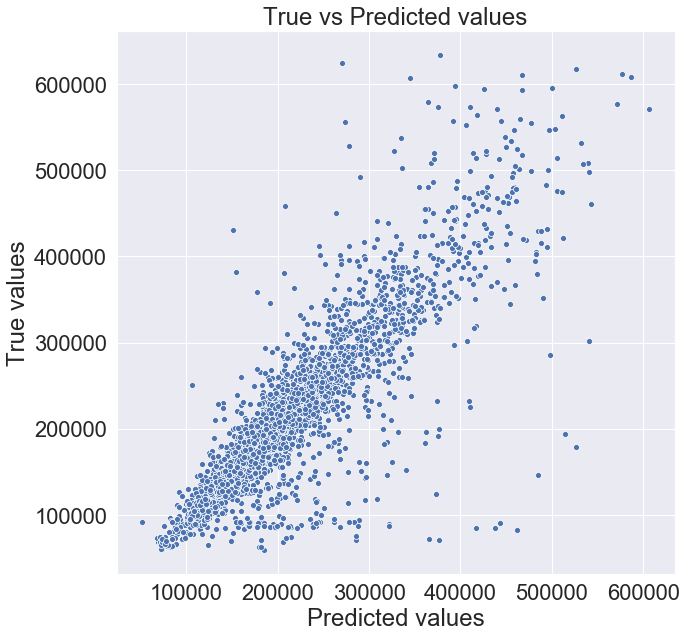

In [163]:
y_valid_preds = gb_model.predict(X_valid)
evaluate_preds(y_valid, y_valid_preds)

Важность признаков

In [164]:
feature_importances = pd.DataFrame(zip(X_train.columns, gb_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
1,Square,0.451549
7,m_2_MedPriceByDistrict,0.366754
8,m_2_MedPriceByHouseYear,0.029613
0,Rooms,0.024442
10,Social_1,0.019055
2,LifeSquare,0.018196
6,HouseYear,0.015947
9,Ecology_1,0.015769
5,HouseFloor,0.014159
3,KitchenSquare,0.013155


Обзор тестового датасета

In [165]:
print(test_df.shape)

(5000, 19)


In [166]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB
None


In [167]:
test_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


Подготовка тестового датасета

Исключаем признак "Healthcare_1", т.к. по нему почти 50% пропусков

In [168]:
test_df = test_df.drop('Healthcare_1', axis=1)

Преобразуем категориальные признаки "Ecology_2", "Ecology_3", "Shops_2"

In [169]:
print(test_df['Ecology_2'].value_counts())
print(test_df['Ecology_3'].value_counts())
print(test_df['Shops_2'].value_counts())

B    4952
A      48
Name: Ecology_2, dtype: int64
B    4851
A     149
Name: Ecology_3, dtype: int64
B    4588
A     412
Name: Shops_2, dtype: int64


In [170]:
test_df['Ecology_2_bin'] = test_df['Ecology_2'].replace({'A':0, 'B':1})
test_df['Ecology_3_bin'] = test_df['Ecology_3'].replace({'A':0, 'B':1})
test_df['Shops_2_bin'] = test_df['Shops_2'].replace({'A':0, 'B':1})

Работаем с выбросами признака "Rooms"

In [171]:
test_df.loc[test_df['Rooms'].isin([0, 17]), 'Rooms'] = rooms_med

Работаем с выбросами признаков "LifeSquare" и "KitchenSquare"

In [172]:
test_df.loc[test_df['LifeSquare'].isnull(), 'LifeSquare'] = lifesq_med
test_df.loc[test_df['LifeSquare'] < 10, 'LifeSquare'] = lifesq_med
test_df.loc[test_df['LifeSquare'] > 200, 'LifeSquare'] = lifesq_med
test_df.loc[test_df['KitchenSquare'] < 5, 'KitchenSquare'] = kitchsq_med
test_df.loc[test_df['KitchenSquare'] > 80, 'KitchenSquare'] = kitchsq_med

Работаем с выбросами признака "Square"

In [173]:
test_df.loc[test_df['Square'] < 16, 'Square'] = square_med
test_df.loc[test_df['Square'] > 400, 'Square'] = square_med

Работаем с выбросами признаков "Floor" и "HouseFloor"

In [174]:
test_df.loc[test_df['HouseFloor'] == 0, 'HouseFloor'] = hfloor_med

In [175]:
ind = test_df[test_df['Floor'] > test_df['HouseFloor']].index
test_df.loc[ind, 'Floor'] = test_df.loc[ind, 'HouseFloor']

Добавляем новые признаки к датасету

In [176]:
test_df = test_df.merge(m_2_MedPriceByDistrict, on=['DistrictId'], how='left')
test_df = test_df.merge(m_2_MedPriceByHouseYear, on=['HouseYear'], how='left')

Заполняем возможные пропуски

In [177]:
test_df.loc[test_df['m_2_MedPriceByDistrict'].isnull(), 'm_2_MedPriceByDistrict'] =\
                    m_2_MedPriceByDistrict['m_2_MedPriceByDistrict'].median()

In [178]:
test_df.loc[(test_df['m_2_MedPriceByHouseYear'].isnull()) & (test_df['HouseYear'] < 1950), 
                     'm_2_MedPriceByHouseYear'] =\
                      m_2_MedPriceByHouseYear.loc[m_2_MedPriceByHouseYear['HouseYear'] < 1950,
                                                  'm_2_MedPriceByHouseYear'].median()

In [179]:
test_df.loc[(test_df['m_2_MedPriceByHouseYear'].isnull()) & (test_df['HouseYear'] >= 1990), 
                     'm_2_MedPriceByHouseYear'] =\
                      m_2_MedPriceByHouseYear.loc[m_2_MedPriceByHouseYear['HouseYear'] >= 1990,
                                                  'm_2_MedPriceByHouseYear'].median()

In [180]:
test_df.loc[(test_df['m_2_MedPriceByHouseYear'].isnull()) & (test_df['HouseYear'] >= 1950) &\
                    (test_df['HouseYear'] < 1990), 'm_2_MedPriceByHouseYear'] =\
                      m_2_MedPriceByHouseYear.loc[(m_2_MedPriceByHouseYear['HouseYear'] >= 1950) & \
                                                  (m_2_MedPriceByHouseYear['HouseYear'] < 1990),
                                                  'm_2_MedPriceByHouseYear'].median()

In [181]:
test_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,m_2_MedPriceByDistrict,m_2_MedPriceByHouseYear
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.90780,56.543749,36.047463,7.425800,8.054000,12.941600,1984.392600,0.119874,24.933800,5406.900000,8.262600,1.31940,4.242800,0.990400,0.970200,0.917600,3946.750805,3790.421605
std,4832.674037,44.179466,0.81008,18.955344,14.706864,3.038674,5.337076,6.466881,18.573149,0.120070,17.532202,4026.614773,23.863762,1.47994,4.777365,0.097518,0.170052,0.275001,985.494228,761.818482
min,1.000000,0.000000,1.00000,16.319015,10.692499,5.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2273.498737,2793.739365
25%,4221.750000,21.000000,1.00000,41.951045,27.990919,6.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,2949.975415,2901.326376
50%,8320.500000,37.000000,2.00000,52.921340,32.781260,6.000000,7.000000,13.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.00000,3.000000,1.000000,1.000000,1.000000,4158.187979,4285.794408
75%,12598.250000,77.000000,2.00000,66.285129,41.760597,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,2.00000,6.000000,1.000000,1.000000,1.000000,4571.660177,4409.376396
max,16795.000000,212.000000,6.00000,223.453689,169.901701,65.000000,46.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.00000,23.000000,1.000000,1.000000,1.000000,8700.768533,7823.822055


Масштабируем признаки

In [182]:
stand_features = scaler.fit_transform(test_df[feature_names])

In [183]:
test_df[feature_names] = pd.DataFrame(stand_features, columns=feature_names)

Предсказываем цены для тестового датасета¶

In [184]:
X_test = test_df[feature_names]

In [185]:
y_test_preds = gb_model.predict(X_test)

Сохраняем результаты

In [186]:
test_df['Price'] = y_test_preds

In [187]:
test_df.to_csv(PREDICTIONS_PATH, columns=['Id', 'Price'], index=False, encoding='utf-8')

In [188]:
print(y_test_preds)

[164458.43017737 216300.55543514 272844.1635563  ... 287805.07697688
 201779.6857984  176929.98550873]


In [189]:
print(X_test)

         Rooms    Square  LifeSquare  KitchenSquare     Floor  HouseFloor  \
0     0.113827 -0.351446   -0.177804      -0.469265 -0.384893    0.163681   
1     0.113827  0.671088   -0.222109      -0.469265 -1.321830   -1.846763   
2    -1.120741 -0.212649   -1.366792       1.505478 -1.134442   -1.228165   
3     0.113827  0.870705    1.080786       0.518107  2.613303    1.400877   
4    -1.120741 -0.475725    0.499144      -0.469265  1.676366    0.627630   
...        ...       ...         ...            ...       ...         ...   
4995  1.348396  0.558746    1.003872      -0.469265 -0.572281   -0.609567   
4996 -1.120741 -0.862391   -0.968380       0.847230  0.739430    0.627630   
4997  1.348396  1.123723    0.832019       0.518107  2.613303    1.400877   
4998  0.113827  1.306436   -0.222109      -0.469265 -0.759668    0.009032   
4999  0.113827  0.211674   -0.222109      -0.469265  0.364656    0.627630   

      HouseYear  m_2_MedPriceByDistrict  m_2_MedPriceByHouseYear  Ecology_1